In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

import time

from math import *

Voz’mem k0(t) ravnym sinusu s nekotorym periodom (neskol’ko
osnovnyh periodov – 40-50 let) + constanta >1 .
Vse eto umnozeno na nekotoruju konstantu - s takim raschetom,
chto by poluchajuschajasja del_fi(t)(raznost' faz) byla
ne bolee 1 (radian) , no mogla by dostigat' (v makasimume) hotja by 0.5

  Shum voz’mem v vide AR(1) s kakim – nibud’ naborom
parametrov – tak , chto by on byl ne velik v sravnenii
s osnovnym sinusom.  (Mozno poprobovat’ raznye nabory parametrov)

   del_omega vyberem 0.1 ili 0.15

In [45]:
N_grid=34698

t_start=1913.5
t_end=2008.5
t=np.linspace(t_start, t_end, N_grid)
h=t[1]-t[0]

dw=0.1
p=365*11+2

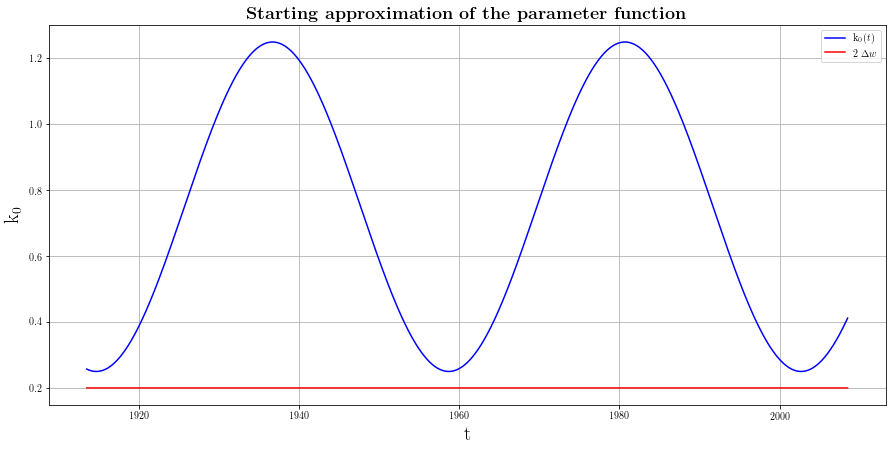

In [51]:
s=44
T_sin=s*365
m=1.5
eps=np.pi/2-0.1

weight=0.5

k0_s=weight*(np.sin((2*np.pi)/s*t+eps)+m)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(t, k0_s, 'b')
plt.plot(t, [2*dw]*N_grid, 'r')
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'k_0', fontsize=20)
plt.title(r'\textbf{Starting approximation of the parameter function}', fontsize=18)
plt.legend(['k_0(t)', '2 \Delta w'])
plt.grid()
plt.show()

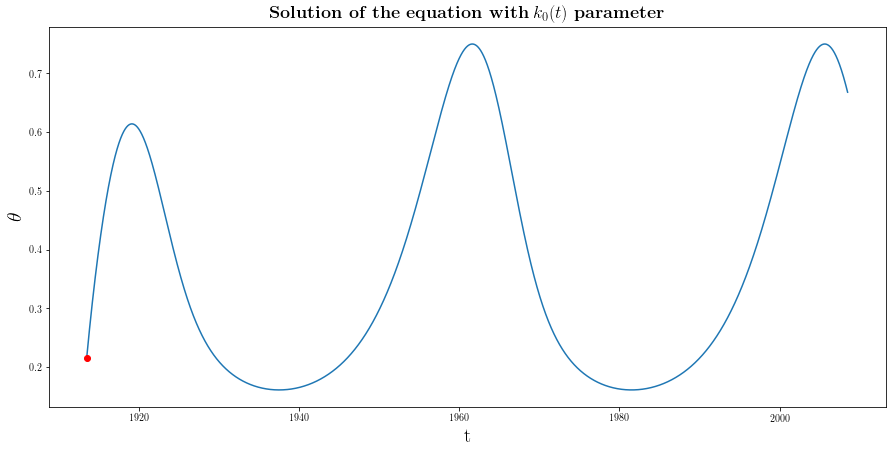

In [52]:
k0_f=interpolate.interp1d(t, k0_s, bounds_error=False, fill_value="extrapolate")
f=lambda t, x: 2*dw-k0_f(t)*sin(x)
init=np.arcsin(2*dw/k0[0])
theta=[0]*N_grid
for i in range(N_grid):
    if i==0:
        theta[i]=init
    else:
        k1=f(t[i-1], theta[i-1])*h
        k2=f(t[i-1]+h/2, theta[i-1]+k1/2)*h
        k3=f(t[i-1]+h/2, theta[i-1]+k2/2)*h
        k4=f(t[i-1]+h, theta[i-1]+k3)*h
        
        theta[i]=theta[i-1]+(k1+2*k2+2*k3+k4)/6

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(t, theta)
plt.plot(t_start, init, 'ro')
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'$\theta $', fontsize=20)
plt.title(r'\textbf{Solution of the equation with} $k_0(t)$ \textbf{parameter}', fontsize=18)
plt.show()

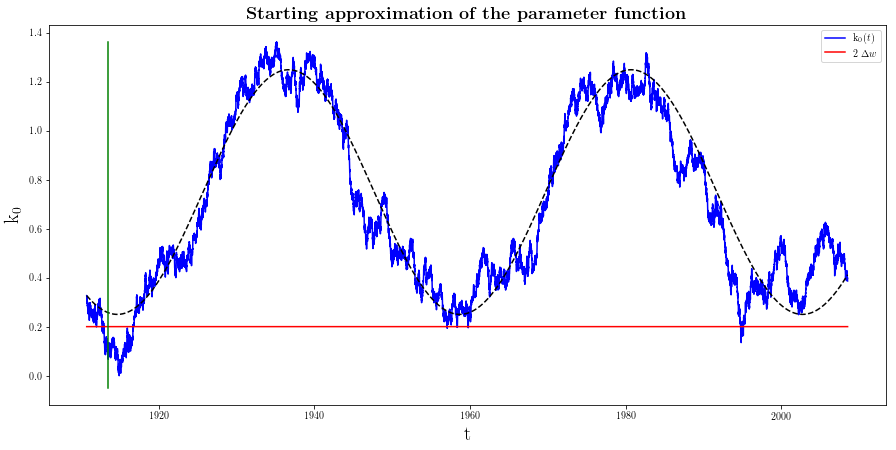

ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ


In [105]:
alpha=0.999
wait_time=int(1/(1-alpha))

t_t=np.linspace(t_start-wait_time/365, t_end, N_grid+wait_time)
k0_t=np.zeros(N_grid+wait_time, np.dtype(float))
k0_clear=weight*(np.sin((2*np.pi)/s*t_t+eps)+m)

sigma=0.005

np.random.seed
xi=sigma*np.random.randn(N_grid+wait_time)

for i in range(N_grid+wait_time):
    if i==0:
        k0_t[i]=0
    else:
        k0_t[i]=alpha*k0_t[i-1]+xi[i-1]
        
k0_t=k0_t+k0_clear

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
#plt.ylim((min(k0_t)-0.05, max(k0_t)))
plt.plot(t_t, k0_t, 'b')
plt.plot(t_t, [2*dw]*(N_grid+wait_time), 'r')
#plt.plot(t_t, [(2*dw+sigma*move)]*(N_grid+wait_time), 'k--')
plt.plot(t_t, k0_clear, 'k--')
plt.plot((t_start, t_start), (min(k0_t)-0.05, max(k0_t)), 'g-')

#plt.plot(t, k0_s, 'm')

plt.xlabel(r't', fontsize=20)
plt.ylabel(r'k_0', fontsize=20)
plt.title(r'\textbf{Starting approximation of the parameter function}', fontsize=18)
plt.legend(['k_0(t)', '2 \Delta w'])
plt.show()

k0=np.zeros(N_grid, np.dtype(float))
k0=k0_t[int(1/(1-alpha)):]
if k0[0]<2*dw:
    k0[0]=k0_clear[int(1/(1-alpha))]
    print("ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ")

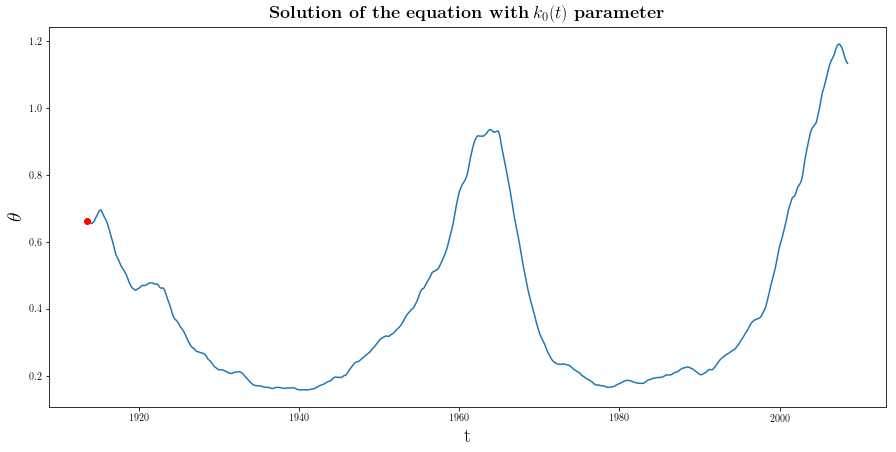

In [92]:
k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")
f=lambda t, x: 2*dw-k0_f(t)*sin(x)
init=np.arcsin(2*dw/k0[0])
theta=[0]*N_grid
for i in range(N_grid):
    if i==0:
        theta[i]=init
    else:
        k1=f(t[i-1], theta[i-1])*h
        k2=f(t[i-1]+h/2, theta[i-1]+k1/2)*h
        k3=f(t[i-1]+h/2, theta[i-1]+k2/2)*h
        k4=f(t[i-1]+h, theta[i-1]+k3)*h
        
        theta[i]=theta[i-1]+(k1+2*k2+2*k3+k4)/6

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(t, theta)
plt.plot(t_start, init, 'ro')
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'$\theta $', fontsize=20)
plt.title(r'\textbf{Solution of the equation with} $k_0(t)$ \textbf{parameter}', fontsize=18)

plt.show()

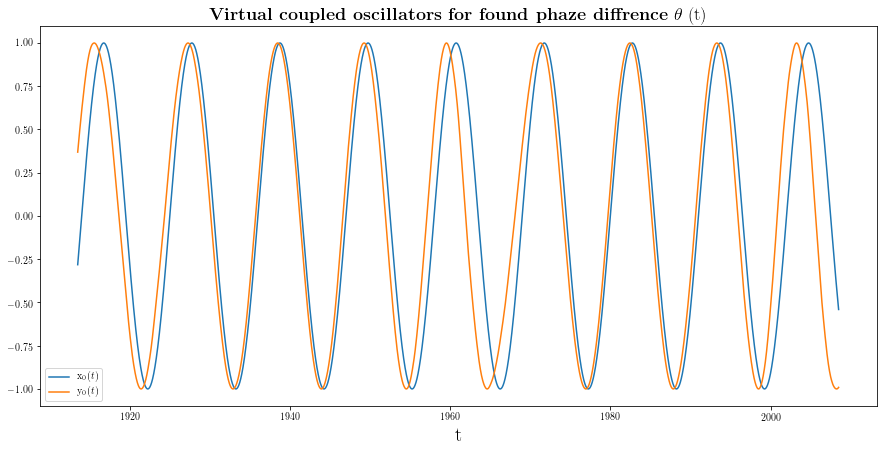

In [93]:
W=2*np.pi/11
T=11
L=t_end

theta=np.array(theta)

x0=np.sin(W*t)
y0=np.sin(W*t+theta)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(t, x0, label='$x_0(t)$')
plt.plot(t, y0, label='$y_0(t)$')
plt.legend(['x_0(t)', 'y_0(t)'])
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Virtual coupled oscillators for found phaze diffrence} $\theta$ (t)', fontsize=18)
plt.show()

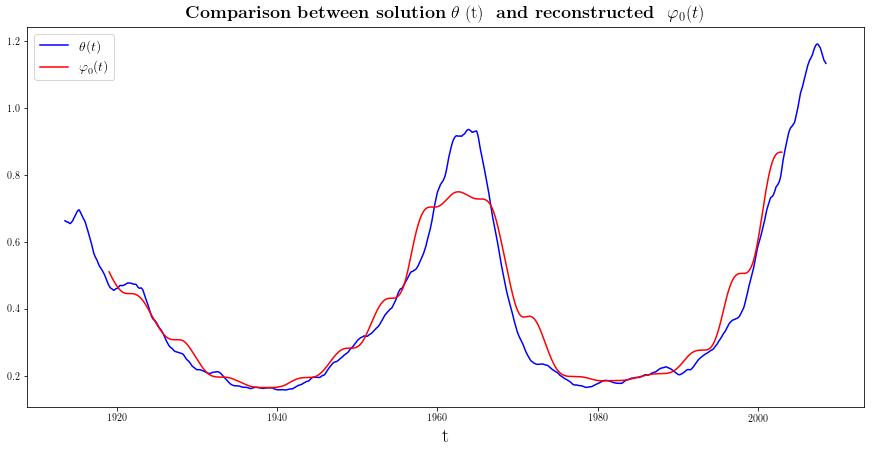

In [94]:
C_0=[0]*N_grid

for i in range(N_grid):
    if (t[i]-T/2>=t_start) and (t[i]+T/2<=t_end):
        C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
    else:
        C_0[i]=nan
        
phi0=np.arccos(C_0)
        
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(t, theta, 'b')
plt.plot(t, phi0, 'r')
plt.legend([r'$\theta(t)$', r'$\varphi_0(t)$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between solution} $\theta$ (t) \textbf{ and reconstructed } $\varphi_0(t)$', fontsize=18)
plt.show()

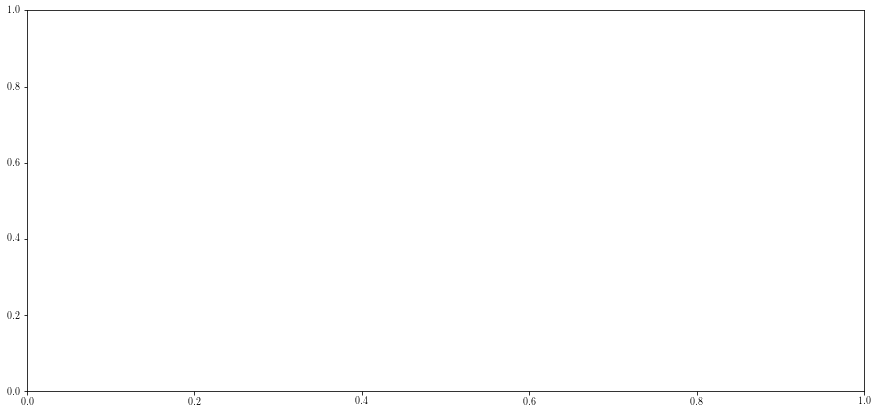

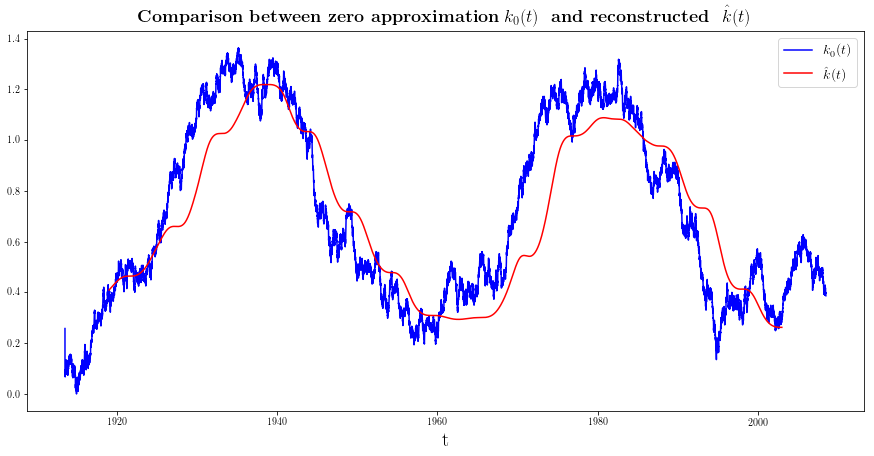

In [107]:
k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
#plt.plot(t, k0_clear, 'k--')
plt.plot(t, k0, 'b')
plt.plot(t, k_hat, 'r')
plt.legend([r'$k_0(t)$', r'$\hat{k}(t)$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between zero approximation} $k_0(t)$ \textbf{ and reconstructed } $\hat{k}(t)$', fontsize=18)
plt.show()

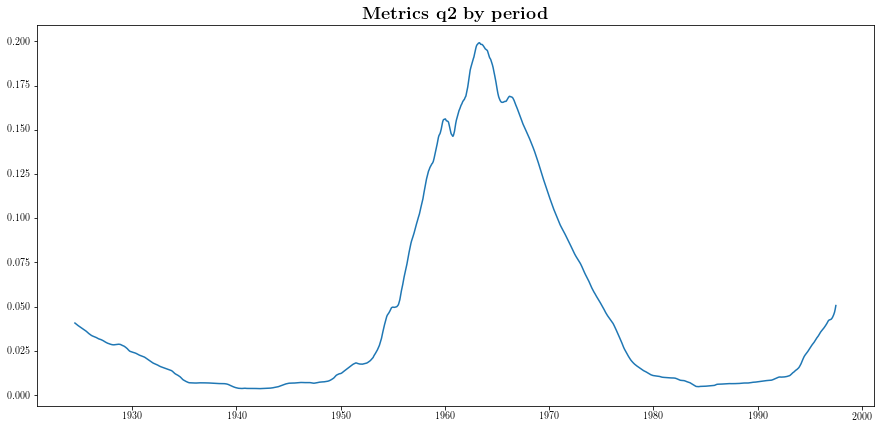

0.19919731866512716

In [96]:
q_t_ar=[]

st=int(p/2)+1
fn=N_grid-st-1

for i in range(fn-p-st):
    mk=np.array([np.mean(k0[st+i:st+i+p-1])]*p)
    sk=(sum(np.multiply(k0[st+i:st+i+p-1], k0[st+i:st+i+p-1])*h))
    q_t_ar.append((sum(np.multiply(k_hat[st+i:st+i+p-1]-k0[st+i:st+i+p-1], k_hat[st+i:st+i+p-1]-k0[st+i:st+i+p-1])*h))/sk)
    
qt=max(q_t_ar)

q_t_ar=np.array(q_t_ar)


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(t[p+1:N_grid-p-1], q_t_ar)
plt.title(r'\textbf{Metrics q2 by period}', fontsize=18)
plt.show()
qt

In [101]:
k_hat[fn]

nan